# Churn Prediction for an OTT Platform

The objective of this challenge was to predict which customers will churn and which customers won't. The dataset provided to us contains multiple columns. Let's checkout what are the different variables available and their description.

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


Seems like there are 18 independent variables (we will not consider 'CustomerID' as it does not influence the Churn) and 1 dependent (or target) variable, i.e. 'Churn'.

## Import Python Modules

First, I will be importing the primary modules that will be used in this project. Some of the following popular packages will be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

We need to install 'xgboost' module as it is not pre-installed on this machine.

### Installing XGBoost package

In [2]:
# Installing xgboost
!pip install xgboost

     |████████████████████████████████| 255.9 MB 30 kB/s              
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [2]:
# Importing pandas and numpy for data manipulation and analysis of the dataset
import pandas as pd
import numpy as np

# Visualization Packages to do Exploratory Data Analysis
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# For pre-processing
from sklearn.preprocessing import MinMaxScaler

# For splitting the model into training and testing dataset
from sklearn.model_selection import train_test_split

# For building different Machine Learning Models
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# XGBoost
from xgboost import XGBClassifier

# For hyper-parameter tuning
from sklearn.model_selection import GridSearchCV

# For evaluating recall, precision, accuracy and f1 scores, and roc auc score of models
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score

### Using different Tuned Machine Learning Models

We will be using 4 different Machine Learning Models to predict the Churn:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. XGBoost

All 4 of these models' parameters will be tuned using GridSearchCV to find the best parameters that will give the highest **ROC AUC Score**. The best out of these 4 tuned models will be submitted.

## Load the Data

Now, I have been provided with 2 different datasets: One for training our models and the other that will check our model's efficiency on unseen data using ROC AUC score as the scoring metric. Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [3]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [4]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Exploring, Cleaning, Validating, and Visualizing the Data

We will first explore, validate and visualize the data, and if need occurs, we will clean it too.<br>
Let's first start with the description of the data.

In [4]:
# Checking for description of the data
train_df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


Everything looks pretty much straight forward.<br>
<br>
Let's check if there are any missing values in any of the columns.

In [5]:
# Checking for any missing values
train_df.isna().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

No missing values. Great!<br>
<br>
Let's check if there are any duplicate rows in the dataset.

In [6]:
# Checking for any duplicate values
print("Number of duplicate rows:", train_df.drop(columns=['CustomerID', 'Churn']).duplicated().sum())

Number of duplicate rows: 0


No duplicate values either.<br>

Finally, let's check for any outliers in the continuous type variables. I will be using boxplot to visualize which variables have outliers.

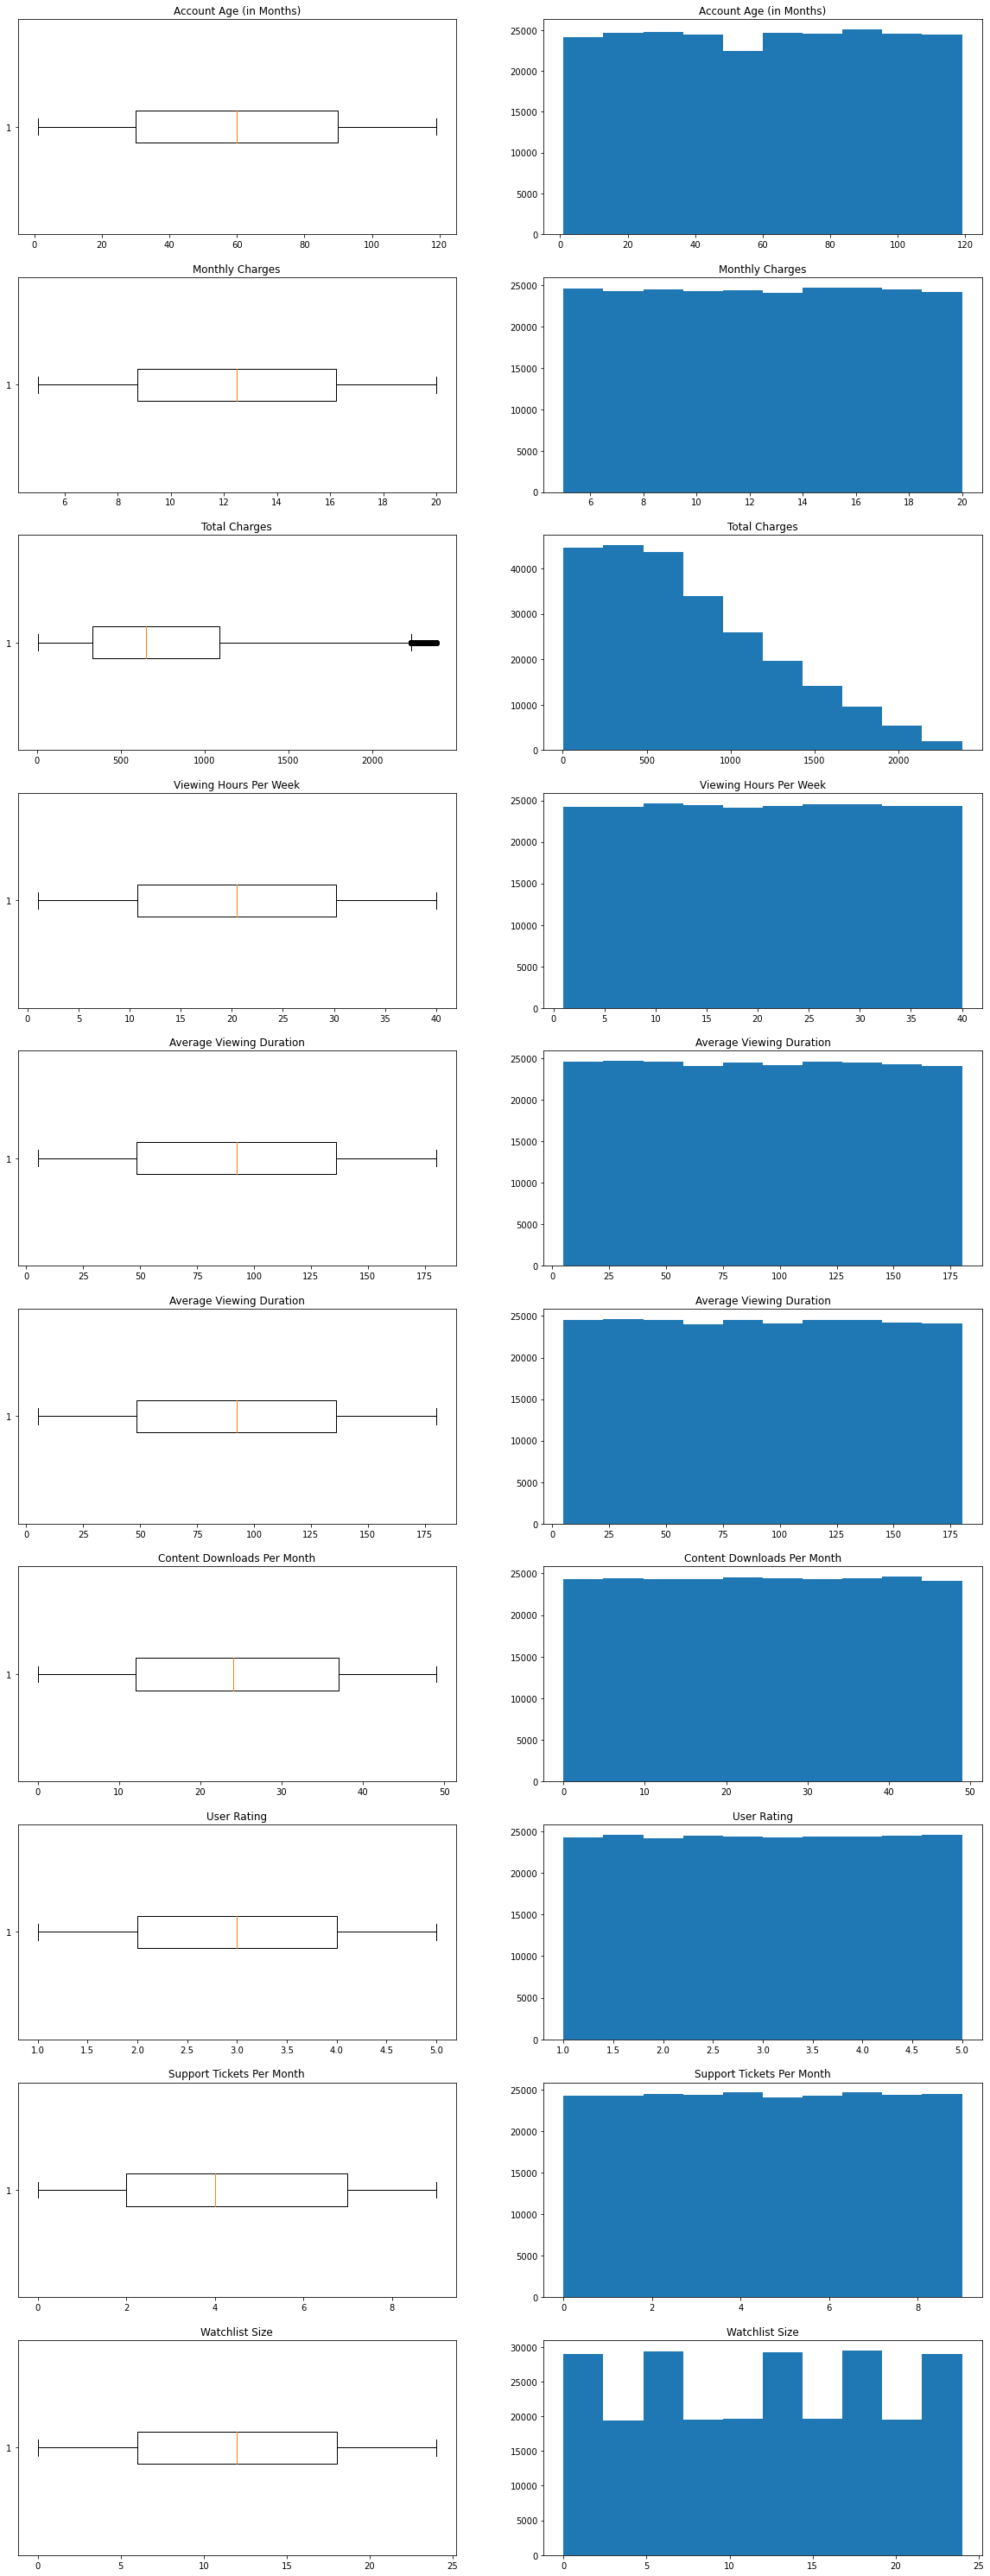

In [7]:
# Checking for outliers in different variables using a boxplot and checking for the kind of distribution using histogram
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(20,54))

axs[0][0].boxplot(x=train_df['AccountAge'], vert=False)
axs[0][0].set_title('Account Age (in Months)')
axs[0][1].hist(x=train_df['AccountAge'])
axs[0][1].set_title('Account Age (in Months)')

axs[1][0].boxplot(x=train_df['MonthlyCharges'], vert=False)
axs[1][0].set_title('Monthly Charges')
axs[1][1].hist(x=train_df['MonthlyCharges'])
axs[1][1].set_title('Monthly Charges')

axs[2][0].boxplot(x=train_df['TotalCharges'], vert=False)
axs[2][0].set_title('Total Charges')
axs[2][1].hist(x=train_df['TotalCharges'])
axs[2][1].set_title('Total Charges')

axs[3][0].boxplot(x=train_df['ViewingHoursPerWeek'], vert=False)
axs[3][0].set_title('Viewing Hours Per Week')
axs[3][1].hist(x=train_df['ViewingHoursPerWeek'])
axs[3][1].set_title('Viewing Hours Per Week')

axs[4][0].boxplot(x=train_df['AverageViewingDuration'], vert=False)
axs[4][0].set_title('Average Viewing Duration')
axs[4][1].hist(x=train_df['AverageViewingDuration'])
axs[4][1].set_title('Average Viewing Duration')

axs[5][0].boxplot(x=train_df['AverageViewingDuration'], vert=False)
axs[5][0].set_title('Average Viewing Duration')
axs[5][1].hist(x=train_df['AverageViewingDuration'])
axs[5][1].set_title('Average Viewing Duration')

axs[6][0].boxplot(x=train_df['ContentDownloadsPerMonth'], vert=False)
axs[6][0].set_title('Content Downloads Per Month')
axs[6][1].hist(x=train_df['ContentDownloadsPerMonth'])
axs[6][1].set_title('Content Downloads Per Month')

axs[7][0].boxplot(x=train_df['UserRating'], vert=False)
axs[7][0].set_title('User Rating')
axs[7][1].hist(x=train_df['UserRating'])
axs[7][1].set_title('User Rating')

axs[8][0].boxplot(x=train_df['SupportTicketsPerMonth'], vert=False)
axs[8][0].set_title('Support Tickets Per Month')
axs[8][1].hist(x=train_df['SupportTicketsPerMonth'])
axs[8][1].set_title('Support Tickets Per Month')

axs[9][0].boxplot(x=train_df['WatchlistSize'], vert=False)
axs[9][0].set_title('Watchlist Size')
axs[9][1].hist(x=train_df['WatchlistSize'])
axs[9][1].set_title('Watchlist Size')

plt.show()

Seems like there are no outliers in any of the continuous variables except for `TotalCharges`. But because I know the context why there might be outliers in this variable, we will not take any action against it.<br>
<br>
I have checked the distribution for all the independent variables. Now, let's check the distribution in our dependent variable.

In [22]:
# Checking for any imbalance in the dependent variable
display(train_df['Churn'].value_counts())
display(train_df['Churn'].value_counts(normalize=True)*100)

0    199605
1     44182
Name: Churn, dtype: int64

0    81.876802
1    18.123198
Name: Churn, dtype: float64

Seems like there is a class imbalance in the dependent variable:
* ~82% of the people did not churn.
* ~18% of the people have churned.

### Dealing with Class Imabalance

The class imbalance does exist.
There are more people who did not churn (\~82%) and there are less people who churned (\~18%).
We will increase the sample of people who have churned using SMOTE.

In [5]:
# Pre-processing the dataset before balancing the imbalance dataset using over-sampling using SMOTE
# Creating a copy so that the original dataset is untouched
train_df1 = train_df.copy()


# Scaling all continuous data tyoe columns
# Scaling AccountAge in the range (0,1)
accountage_scaler = MinMaxScaler(feature_range=(0,1), clip=True)
accountage_scaler.fit(train_df1[['AccountAge']])
train_df1['AccountAge'] = accountage_scaler.transform(train_df1[['AccountAge']])

# Scaling MonthlyCharges in the range (0,1)
monthlycharges_scaler = MinMaxScaler(feature_range=(0,1), clip=True)
monthlycharges_scaler.fit(train_df1[['MonthlyCharges']])
train_df1['MonthlyCharges'] = monthlycharges_scaler.transform(train_df1[['MonthlyCharges']])

# Scaling TotalCharges in the range (0,1)
totalcharges_scaler = MinMaxScaler(feature_range=(0,1), clip=True)
totalcharges_scaler.fit(train_df1[['TotalCharges']])
train_df1['TotalCharges'] = totalcharges_scaler.transform(train_df1[['TotalCharges']])

# Scaling ViewingHoursPerWeek in the range (0,1)
viewinghoursperweek_scaler = MinMaxScaler(feature_range=(0,1), clip=True)
viewinghoursperweek_scaler.fit(train_df1[['ViewingHoursPerWeek']])
train_df1['ViewingHoursPerWeek'] = viewinghoursperweek_scaler.transform(train_df1[['ViewingHoursPerWeek']])

# Scaling AverageViewingDuration in the range (0,1)
averageviewingduration_scaler = MinMaxScaler(feature_range=(0,1), clip=True)
averageviewingduration_scaler.fit(train_df1[['AverageViewingDuration']])
train_df1['AverageViewingDuration'] = averageviewingduration_scaler.transform(train_df1[['AverageViewingDuration']])

# Scaling ContentDownloadsPerMonth in the range (0,1)
contentdownloadspermonth_scaler = MinMaxScaler(feature_range=(0,1), clip=True)
contentdownloadspermonth_scaler.fit(train_df1[['ContentDownloadsPerMonth']])
train_df1['ContentDownloadsPerMonth'] = contentdownloadspermonth_scaler.transform(train_df1[['ContentDownloadsPerMonth']])

# Scaling UserRating in the range (0,1)
userrating_scaler = MinMaxScaler(feature_range=(0,1), clip=True)
userrating_scaler.fit(train_df1[['UserRating']])
train_df1['UserRating'] = userrating_scaler.transform(train_df1[['UserRating']])

# Scaling SupportTicketsPerMonth in the range (0,1)
supportticketspermonth_scaler = MinMaxScaler(feature_range=(0,1), clip=True)
supportticketspermonth_scaler.fit(train_df1[['SupportTicketsPerMonth']])
train_df1['SupportTicketsPerMonth'] = supportticketspermonth_scaler.transform(train_df1[['SupportTicketsPerMonth']])

# Scaling WatchlistSize in the range (0,1)
watchlistsize_scaler = MinMaxScaler(feature_range=(0,1), clip=True)
watchlistsize_scaler.fit(train_df1[['WatchlistSize']])
train_df1['WatchlistSize'] = watchlistsize_scaler.transform(train_df1[['WatchlistSize']])

# Converting hierarchical categorical variables into numerical using mapping
# Mapping and converting SubscriptionType
mapping = {'Basic':0, 'Standard':1, 'Premium':2}
train_df1['SubscriptionType'] = train_df1['SubscriptionType'].map(mapping)
# Scaling SubscriptionType in the range (0,1)
subscriptiontype_scaler = MinMaxScaler(feature_range=(0,1), clip=True)
subscriptiontype_scaler.fit(train_df1[['SubscriptionType']])
train_df1['SubscriptionType'] = subscriptiontype_scaler.transform(train_df1[['SubscriptionType']])

# Mapping and converting PaperlessBilling
mapping = {'No':0, 'Yes':1}
train_df1['PaperlessBilling'] = train_df1['PaperlessBilling'].map(mapping)

# Mapping and converting MultiDeviceAccess
mapping = {'No':0, 'Yes':1}
train_df1['MultiDeviceAccess'] = train_df1['MultiDeviceAccess'].map(mapping)

# Mapping and converting ParentalControl
mapping = {'No':0, 'Yes':1}
train_df1['ParentalControl'] = train_df1['ParentalControl'].map(mapping)

# Mapping and converting SubtitlesEnabled
mapping = {'No':0, 'Yes':1}
train_df1['SubtitlesEnabled'] = train_df1['SubtitlesEnabled'].map(mapping)

# Mapping and converting Gender
mapping = {'Male':0, 'Female':1}
train_df1['Gender'] = train_df1['Gender'].map(mapping)


# Converting non-hierarchical categorical variables into numerical using get_dummies
train_df1 = pd.get_dummies(train_df1, columns=['PaymentMethod', 'ContentType', 'DeviceRegistered', 'GenrePreference'])


# bifurcating dependent and independent variables
train_df1_X = train_df1.drop(columns=['CustomerID', 'Churn'])
train_df1_y = train_df1['Churn']

Let's install `imblearn` package to import `smote` which will generate synthetic data for people who have churned. This will provide the require class balance in our dataset.

In [3]:
# Installing imblearn module
!pip install imblearn

     |████████████████████████████████| 258 kB 49.3 MB/s            
     |████████████████████████████████| 302 kB 75.5 MB/s            
     |████████████████████████████████| 24.8 MB 122.2 MB/s            
     |████████████████████████████████| 38.1 MB 73.6 MB/s            
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: joblib
    Found existing installation: joblib 0.14.1
    Uninstalling joblib-0.14.1:
      Successfully uninstalled joblib-0.14.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [7]:
# Using SMOTE to over-sample the unbalanced class
from imblearn.over_sampling import SMOTE

# oversampling using SMOTE to balance the class
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(train_df1_X, train_df1_y)

In [25]:
# Checking for imbalance now
y_resampled.value_counts()

1    199605
0    199605
Name: Churn, dtype: int64

We can see that now there are equal number of people i.e. 1,99,605 in each of the class (people who have churned and people who didn't churn).<br>
<br>
Now that we have a balanced dataset to start with, let's split the given data into training and testing datasets.<br>
**Note:** These two training and testing datasets will be split from the origina; `train_df` dataset provided.

### Making a common training dataset and a testing dataset for all 4 Machine Learning Models

In [8]:
# Creating a training and a testing dataset so that we can compare results of different Machnine Learning Models
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

### Logistic Regression

Making a logistic Regression model and then tuning it to get the best parameters that produce the best ROC AUC Score.

In [19]:
# Logistic Regression
LogisticRegressionModel = LogisticRegression()

In [ ]:
%%time

# Hyper-parameter tuning to find the best parameters
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'l1_ratio': [0.5, 0.7],
    'max_iter': [100, 200, 500]
}

grid_search_LR = GridSearchCV(estimator=LogisticRegressionModel,
                           param_grid=param_grid,
                           cv=5,
                           scoring='roc_auc',
                           n_jobs=-1,
                           verbose=2)

grid_search_LR.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits<br>
CPU times: total: 2min 27s<br>
Wall time: 2h 52min 54s

In [ ]:
grid_search_LR.best_params_

{'C': 10, 'l1_ratio': 0.5, 'max_iter': 500, 'penalty': None, 'solver': 'saga'}

Following came out to be the best parameters for a Linear Regression Model that produces the best ROC AUC Score:
1. C (Inverse of Regularization Strength) : 10
2. l1_ratio : (Elastic-net mixing parameter) : 0.5
3. max_iter (Max number of iterations taken for the solvers to converge) : 500
4. penalty (Which Regularization method to use) : None
5. solver (which algorithm to use in optimization problem) : 'saga'

In [ ]:
LRModel_pred = grid_search_LR.predict(X_test)
print("Recall :", str(round(recall_score(y_test, LRModel_pred), 4)*100) + "%")
print("Precision :", str(round(precision_score(y_test, LRModel_pred), 4)*100) + "%")
print("Accuracy :", str(round(accuracy_score(y_test, LRModel_pred), 4)*100) + "%")
print("F1 Score :", str(round(f1_score(y_test, LRModel_pred), 4)*100) + "%")
print("ROC AUC Score :", str(round(roc_auc_score(y_test, LRModel_pred), 4)*100) + "%")

Recall : 71.94%<br>
Precision : 70.38%<br>
Accuracy : 70.83%<br>
F1 Score : 71.15%<br>
ROC AUC Score : 70.83%

### Decision Tree

Making a Decision Tree model and then tuning it to get the best parameters that produce the best ROC AUC Score.

In [15]:
# Decision Tree
DecisionTreeModel = DecisionTreeClassifier()

In [ ]:
%%time

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search_DT = GridSearchCV(estimator=DecisionTreeModel,
                              param_grid=param_grid,
                              cv=5,
                              scoring='roc_auc',
                              n_jobs=-1,
                              verbose=2)

grid_search_DT.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits<br>
CPU times: total: 17.1 s<br>
Wall time: 24min

In [ ]:
grid_search_DT.best_params_

{'criterion': 'entropy',<br>
 'max_depth': 20,<br>
 'max_features': None,<br>
 'min_samples_leaf': 5,<br>
 'min_samples_split': 10}

Following came out to be the best parameters for a Linear Regression Model that produces the best ROC AUC Score:
1. criterion (Technique used to measure the quality of split) : 'entropy'
2. max_depth (The maximum depth of the tree) : 20
3. max_features (The maximum features to be considered when looking for the best split) : None
4. min_samples_leaf (The minimum number of samples required to be at a leaf node) : 5
5. min_samples_split (The minimum number of samples required to split an internal node) : 10

In [ ]:
DTModel_pred = grid_search_DT.predict(X_test)
print("Recall :", str(round(recall_score(y_test, DTModel_pred), 4)*100) + "%")
print("Precision :", str(round(precision_score(y_test, DTModel_pred), 4)*100) + "%")
print("Accuracy :", str(round(accuracy_score(y_test, DTModel_pred), 4)*100) + "%")
print("F1 Score :", str(round(f1_score(y_test, DTModel_pred), 4)*100) + "%")
print("ROC AUC Score :", str(round(roc_auc_score(y_test, DTModel_pred), 4)*100) + "%")

Recall : 80.31%<br>
Precision : 89.22%<br>
Accuracy : 85.31%<br>
F1 Score : 84.53%<br>
ROC AUC Score : 85.31%

### Random Forest

Making a Random Forest model and then tuning it to get the best parameters that produce the best ROC AUC Score.

In [26]:
# Random Forest
RandomForestModel = RandomForestClassifier()

In [ ]:
%%time

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_RF = GridSearchCV(estimator=RandomForestModel,
                              param_grid=param_grid,
                              cv=5,
                              scoring='roc_auc',
                              n_jobs=-1,
                              verbose=2)

grid_search_RF.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits<br>
CPU times: total: 19min 2s<br>
Wall time: 27h 6min 48s

In [ ]:
grid_search_RF.best_params_

{'criterion': 'entropy',<br>
 'max_depth': None,<br>
 'max_features': 'sqrt',<br>
 'min_samples_leaf': 1,<br>
 'n_estimators': 200}

Following came out to be the best parameters for a Linear Regression Model that produces the best ROC AUC Score:
1. criterion (Technique used to measure the quality of split) : 'entropy'
2. max_depth (The maximum depth of the tree) : None
3. max_features (The maximum features to be considered when looking for the best split) : sqrt (square root of the available features)
4. min_samples_leaf (The minimum number of samples required to be at a leaf node) : 1
5. n_estimators (The number of trees in the forest) : 200

In [ ]:
RFModel_pred = grid_search_RF.predict(X_test)
print("Recall :", str(round(recall_score(y_test, RFModel_pred), 4)*100) + "%")
print("Precision :", str(round(precision_score(y_test, RFModel_pred), 4)*100) + "%")
print("Accuracy :", str(round(accuracy_score(y_test, RFModel_pred), 4)*100) + "%")
print("F1 Score :", str(round(f1_score(y_test, RFModel_pred), 4)*100) + "%")
print("ROC AUC Score :", str(round(roc_auc_score(y_test, RFModel_pred), 4)*100) + "%")

Recall : 90.25%<br>
Precision : 92.98%<br>
Accuracy : 91.72%<br>
F1 Score : 91.59%<br>
ROC AUC Score : 91.72%

### XGBoost

Making a XGBoost model and then tuning it to get the best parameters that produce the best ROC AUC Score.

In [25]:
# XGBoost
XGBoostModel = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_jobs=-1,
    random_state=42
)

In [ ]:
%%time

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.15, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.1],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'reg_alpha': [0, 0.01],
    'reg_lambda': [1, 5]
}

grid_search_XGB = GridSearchCV(
    estimator=XGBoostModel,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

grid_search_XGB.fit(X_train, y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits<br>
CPU times: total: 2min 56s<br>
Wall time: 11h 22min 42s

In [ ]:
grid_search_XGB.best_params_

{'colsample_bytree': 0.9,<br>
 'gamma': 0,<br>
 'learning_rate': 0.15,<br>
 'max_depth': 7,<br>
 'min_child_weight': 5,<br>
 'n_estimators': 300,<br>
 'reg_alpha': 0,<br>
 'reg_lambda': 1,<br>
 'subsample': 0.9}

Following came out to be the best parameters for a Linear Regression Model that produces the best ROC AUC Score:
1. colsample_bytree (subsample ratio of columns when constructing each tree) : 0.9
2. gamma (Minimum loss reduction required to make a further partition) : 0
3. learning_rate (Technique used to measure the quality of split) : 0.15
4. max_depth (The maximum depth of the tree) : 7
5. min_child_weight (Minimum sum of instance weight (hessian) needed in a child) : 5
6. n_estimators (The number of trees in the forest) : 300
7. reg_alpha (L1 regularization term on weights) : 0
8. reg_lambda (L2 regularization term on weights) : 1
9. subsample (Subsample ratio of the training instances) : 0.9

In [ ]:
XGBModel_pred = grid_search_XGB.predict(X_test)
print("Recall :", str(round(recall_score(y_test, XGBModel_pred), 4)*100) + "%")
print("Precision :", str(round(precision_score(y_test, XGBModel_pred), 4)*100) + "%")
print("Accuracy :", str(round(accuracy_score(y_test, XGBModel_pred), 4)*100) + "%")
print("F1 Score :", str(round(f1_score(y_test, XGBModel_pred), 4)*100) + "%")
print("ROC AUC Score :", str(round(roc_auc_score(y_test, XGBModel_pred), 4)*100) + "%")

Recall : 86.31%<br>
Precision : 98.47%<br>
Accuracy : 92.49%<br>
F1 Score : 91.99%<br>
ROC AUC Score : 92.49%

## Comparing the results of different models

The most important metric for this problem is ROC AUC Score. We will compare it for all the Tuned Machine Learning Models we have made:

**Logistic Regression:** 89.07%<br>
**Decision Tree:** 81.15%<br>
**Random Forest:** 89.18%<br>
**XGBoost:** 89.02%

**Random Forest** emerges out to be the clear winner

In [35]:
LR = LogisticRegression(C=1, max_iter=100, penalty='l1', solver='liblinear').fit(X_resampled, y_resampled)
DT = DecisionTreeClassifier(criterion='gini', max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=5).fit(X_resampled, y_resampled)
RF = RandomForestClassifier(criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=1, n_estimators=200).fit(X_resampled, y_resampled)
XGB = XGBClassifier(learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=150).fit(X_resampled, y_resampled)

LR_pred = LR.predict(X_resampled)
DT_pred = DT.predict(X_resampled)
RF_pred = RF.predict(X_resampled)
XGB_pred = XGB.predict(X_resampled)

print("Logistic Regression :", str(round(roc_auc_score(y_resampled, LR_pred), 4)*100) + "%")
print("Decision Tree :", str(round(roc_auc_score(y_resampled, DT_pred), 4)*100) + "%")
print("Random Forest :", str(round(roc_auc_score(y_resampled, RF_pred), 4)*100) + "%")
print("XGBoost :", str(round(roc_auc_score(y_resampled, XGB_pred), 4)*100) + "%")

Logistic Regression : 89.1%
Decision Tree : 83.88%
Random Forest : 100.0%
XGBoost : 89.29%


**Note:** Because we did some feature engineering on some of the independent variables in train dataset before training our model, we need to apply same kind of feature engineering on the test dataset before we can pass it to our model to predict the probability.

In [10]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Pre-processing test dataset before it can be passed to the model for predictions
# Creating a copy so that the original dataset is untouched
test_df1 = test_df.copy()


# Scaling all continuous data tyoe columns
# Scaling AccountAge in the range (0,1)
test_df1['AccountAge'] = accountage_scaler.transform(test_df1[['AccountAge']])

# Scaling MonthlyCharges in the range (0,1)
test_df1['MonthlyCharges'] = monthlycharges_scaler.transform(test_df1[['MonthlyCharges']])

# Scaling TotalCharges in the range (0,1)
test_df1['TotalCharges'] = totalcharges_scaler.transform(test_df1[['TotalCharges']])

# Scaling ViewingHoursPerWeek in the range (0,1)
test_df1['ViewingHoursPerWeek'] = viewinghoursperweek_scaler.transform(test_df1[['ViewingHoursPerWeek']])

# Scaling AverageViewingDuration in the range (0,1)
test_df1['AverageViewingDuration'] = averageviewingduration_scaler.transform(test_df1[['AverageViewingDuration']])

# Scaling ContentDownloadsPerMonth in the range (0,1)
test_df1['ContentDownloadsPerMonth'] = contentdownloadspermonth_scaler.transform(test_df1[['ContentDownloadsPerMonth']])

# Scaling UserRating in the range (0,1)
test_df1['UserRating'] = userrating_scaler.transform(test_df1[['UserRating']])

# Scaling SupportTicketsPerMonth in the range (0,1)
test_df1['SupportTicketsPerMonth'] = supportticketspermonth_scaler.transform(test_df1[['SupportTicketsPerMonth']])

# Scaling WatchlistSize in the range (0,1)
test_df1['WatchlistSize'] = watchlistsize_scaler.transform(test_df1[['WatchlistSize']])

# Converting hierarchical categorical variables into numerical using mapping
# Mapping and converting SubscriptionType
mapping = {'Basic':0, 'Standard':1, 'Premium':2}
test_df1['SubscriptionType'] = test_df1['SubscriptionType'].map(mapping)
# Scaling SubscriptionType in the range (0,1)
test_df1['SubscriptionType'] = subscriptiontype_scaler.transform(test_df1[['SubscriptionType']])

# Mapping and converting PaperlessBilling
mapping = {'No':0, 'Yes':1}
test_df1['PaperlessBilling'] = test_df1['PaperlessBilling'].map(mapping)

# Mapping and converting MultiDeviceAccess
mapping = {'No':0, 'Yes':1}
test_df1['MultiDeviceAccess'] = test_df1['MultiDeviceAccess'].map(mapping)

# Mapping and converting ParentalControl
mapping = {'No':0, 'Yes':1}
test_df1['ParentalControl'] = test_df1['ParentalControl'].map(mapping)

# Mapping and converting SubtitlesEnabled
mapping = {'No':0, 'Yes':1}
test_df1['SubtitlesEnabled'] = test_df1['SubtitlesEnabled'].map(mapping)

# Mapping and converting Gender
mapping = {'Male':0, 'Female':1}
test_df1['Gender'] = test_df1['Gender'].map(mapping)

# Converting non-hierarchical categorical variables into numerical using get_dummies
test_df1 = pd.get_dummies(test_df1, columns=['PaymentMethod', 'ContentType', 'DeviceRegistered', 'GenrePreference'])

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = grid_search_RF.predict_proba(test_df1.drop(['CustomerID'], axis=1))[:, 1]

In [11]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [12]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(104480, 2)


,CustomerID,predicted_probability
0,O1W6BHP6RM,0.129838
1,LFR4X92X8H,0.052245
2,QM5GBIYODA,0.337003
3,D9RXTK2K9F,0.017159
4,ENTCCHR1LR,0.192264
5,7A88BB5IO6,0.392876
6,70OMW9XEWR,0.137790
7,EL1RMFMPYL,0.301217
8,4IA2QPT6ZK,0.181936
9,AEDCWHSJDN,0.218110


## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [13]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [14]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [15]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [16]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [17]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## Note

Although Random Forest emerged out a clear winner, I still have experimented to submit probabilities generated on test dataset using all models one by one to get the highest score and to improve my overall leaderboard ranking.